In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
#Model Prediction

In [4]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [5]:
gbm_model

GradientBoostingRegressor()

In [6]:
y_pred = gbm_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.2426187329406

In [8]:
#Model Tuning

In [27]:
gbm_params = {"learning_rate": [0.001, 0.01],
              "max_depth": [3,5],
              "n_estimators":[100,200],
              "subsample": [1,0.5,0.8]}

In [28]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [29]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [30]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [31]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1).fit(X_train, y_train)

In [32]:
y_pred = gbm_tuned.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

352.269599252417

In [35]:
#Variable Importance levels

In [36]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100}, index=X_train.columns)

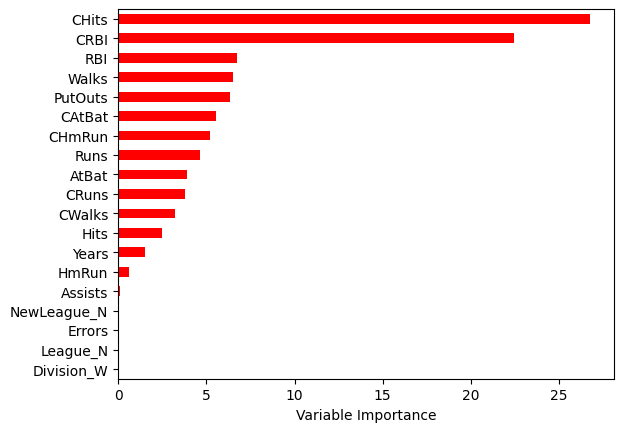

In [37]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Variable Importance")
plt.gca().legend_=None
